<a href="https://colab.research.google.com/github/pacogp/TFM/blob/main/Selecci%C3%B3n_Caracter%C3%ADsticas_TFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Inicialmente importamos las librería y módulos que vamos a necesitar
import pandas as pd
import io 
from google.colab import files

# para manipulación de datos y representaciones visuales vamos a necesitsar importar lo siguiente
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns

In [ ]:
# Cargamos los datos del dataset resultante del la exploración de los datos "datos_completos_dedupped.csv", Enlace: https://github.com/pacogp/TFM
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving datos_completos_dedupped.csv to datos_completos_dedupped.csv
User uploaded file "datos_completos_dedupped.csv" with length 2688414 bytes


In [ ]:
from numpy import corrcoef, transpose, arange
df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col='TIPO_TAPICERIA')
df_feat = transpose(df)
df_feat

TIPO_TAPICERIA,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,...,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,P,T,T,T,T
CLIENTE,386.000000,386.000000,386.000000,4951.000000,4951.000000,4951.000000,6041.000000,6041.000000,6305.000000,6305.000000,6464.000000,6464.000000,6790.000000,6790.000000,7254.000000,8031.000000,8031.000000,8031.000000,8077.000000,8077.000000,8758.000000,47.000000,47.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,813.000000,813.000000,936.000000,936.000000,936.000000,936.000000,1114.000000,1114.000000,...,4775.000000,4775.000000,4775.000000,4775.000000,4775.000000,4775.000000,6220.000000,6289.000000,6289.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6632.000000,7040.000000,7040.000000,7040.000000,7040.000000,7761.000000,7761.000000,8169.000000,8169.000000,8169.000000,8662.000000,8662.000000,9150.000000,9314.000000,9314.000000,9314.000000,9314.000000,9499.000000,9519.000000,9758.000000,9758.000000,9758.000000,9758.000000
MODELO,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,5.000000,5.000000,6.000000,7.000000,7.000000,7.000000,5.000000,5.000000,5.000000,0.000000,0.000000,8.000000,8.000000,4.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,5.000000,5.000000,9.000000,9.000000,9.000000,9.000000,10.000000,10.000000,...,0.000000,0.000000,0.000000,44.000000,44.000000,44.000000,3.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,23.000000,23.000000,16.000000,23.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,65.000000,65.000000,65.000000,29.000000,29.000000,37.000000,12.000000,12.000000,65.000000,20.000000,104.000000,1.000000,44.000000,44.000000,44.000000,80.000000
NUM_PLAZAS,300.000000,100.000000,100.000000,100.000000,100.000000,75.000000,300.000000,200.000000,75.000000,100.000000,100.000000,100.000000,100.000000,200.000000,300.000000,200.000000,100.000000,100.000000,100.000000,100.000000,300.000000,300.000000,100.000000,200.000000,200.000000,100.000000,100.000000,75.000000,100.000000,100.000000,100.000000,200.000000,300.000000,200.000000,100.000000,100.000000,75.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,200.000000,100.000000,100.000000,200.000000,100.000000,100.000000,100.000000,100.000000,100.000000,75.000000,200.000000,50.000000,300.000000,200.000000,0.000000,300.000000,100.000000,100.000000,75.000000,100.000000,300.000000,300.000000,200.000000,300.000000,300.000000,300.000000,75.000000,200.000000,200.000000,300.000000,300.000000,200.000000,300.000000,200.000000,100.000000,100.000000,200.000000,100.000000
MECANISMO_MODULO,0.000000,1.000000,0.000000,2.000000,2.000000,3.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,4.000000,0.000000,4.000000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,...,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,3.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,3.000000,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,3.000000,0.000000,4.000000,0.000000,0.000000,4.000000,0.000000,2.000000,1.000000,0.000000,4.000000,1.000000
IMPORTE_LINEA,592.020000,470.580000,409.860000,266.340000,422.280000,350.520000,552.000000,436.080000,400.200000,274.620000,376.740000,295.320000,442.980000,552.000000,476.100000,290.000000,256.000000,310.000000,362.940000,442.980000,663.780000,625.140000,396.060000,451.260000,380.880000,389.160000,304.980000,361.560000,283.600000,470.580000,373.980000,452.640000,619.620000,471.960000,418.140000,333.960000,420.900000,342.240000,258.060000,328.440000,...,483.000000,383.600000,471.80000

Una vez que contamos con el DataFrame de Pandas podríamos analizar qué características necesitamos y cuales deberíamos excluir.

In [ ]:
names =  df_feat.index
names

Index(['CLIENTE', 'MODELO', 'NUM_PLAZAS', 'MECANISMO_MODULO', 'IMPORTE_LINEA',
       'CATEGORIA', 'COSTE_TAPIZADO_AGRUP', 'P_COSTE', 'MARGEN_UDS_LINEA',
       'DTO_FAMILIA', 'I_COMISION', 'I_BRUTO', 'DTO_PP', 'DTO_LINEAS',
       'MARGEN_BRUTO', 'PROVINCIA', 'COD_COMUNIDAD', 'HIPOTECA',
       'INDENCIAS_CLIENTE', 'PIB_VALOR_EUROS', 'PARO_2020T3',
       'status_cliente'],
      dtype='object')

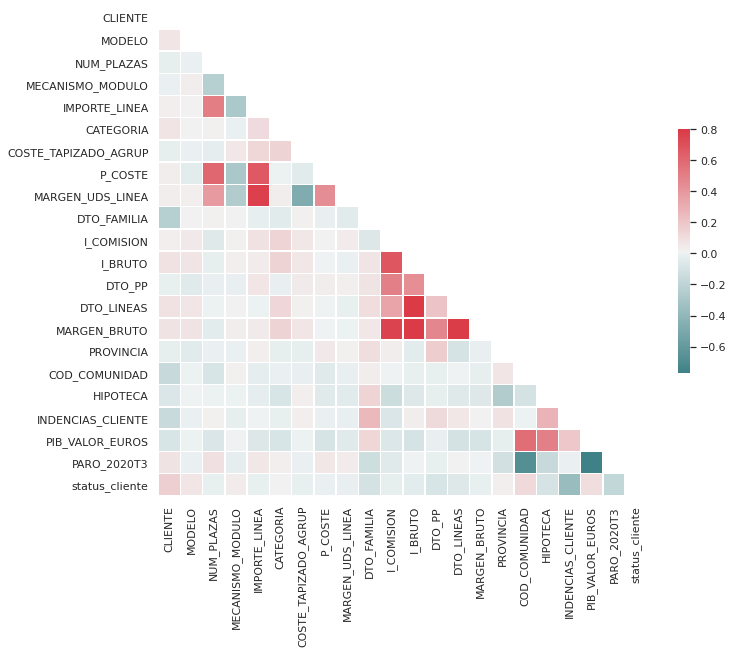

In [ ]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html
R = corrcoef(df_feat)

# http://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
# Generamos una máscara paralos datos por encima del triángulo
sns.set(style="white")
mask = np.zeros_like(R, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Configuramos la figura matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# generamos el color divergente en el colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Dibujamos el mapa de calor con la máscara y rátios correctos
sns.heatmap(R, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=names, yticklabels=names,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Las variables están correlacionadas entre ellas, pero no demasiado (no llega a 1) esto puede hacer que las sigamos teniendo en cuenta aunque hay que ser consciente que algunas de ellas pueden ser muy parecidas.

Variance Ratio:  [0.9653939  0.01930026]


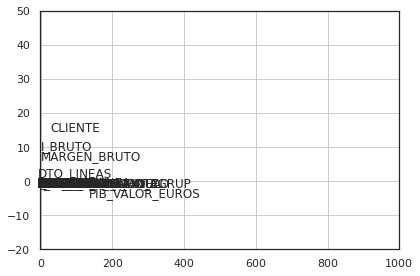

In [ ]:
# Normalizaciónde los datos
#http://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_feat)



# Análisis de componente principale
from sklearn.decomposition import PCA
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i]) 


plt.xlim(-2, 1000)
plt.ylim(-20, 50)
ax.grid(True)
fig.tight_layout()
plt.show()

El ratio de variabilidad por eje es bueno, con el eje X se representa casi el 97% de la variabilidad del conjunto de datos. 

Una vez que hemos verificado que el resultado es fiable podemos ver que muchas de las variables son muy parecidas entre ellas, y son algunas de ellas como 
*PIB_VALOR_EUROS*, *DTO_LINEAS*, *MARGEN_BRUTO*, *I_BRUTO* Y *CLIENTE* los que son distintos de las demás y podrían ser las seleccionadas para realizar un clustering posterior.

En este caso no nos interesa observar qué combinación lineal da forma a cada componente ya que no nos interesa seleccionar aquellos estados que son más relevantes.

# Clustering jerárquico

Dado que tenemos pocos elementos que estudiar podemos utilizar clustering jerárquico para observar las relaciones de similitud entre el desarrollo de las variables. Aquellas grupos de variables que sean similares entre ellas pueden ser resumidas escogiendo una de ellas y de esa forma reduciríamos la dimensionalidad del conjunto de datos.

Para evitar la maldición de la dimensionalidad se puede hacer el clustering con los resultados del análisis de componentes principales, aunque hay que ser precavido ya que aunque reducida, existe perdida de variabilidad en los datos cuando se hace la proyección.

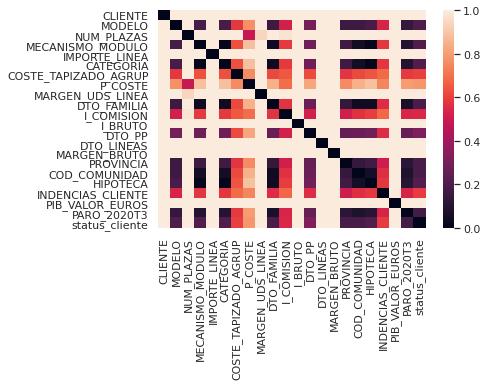

In [ ]:
# 2. Compute the similarity matrix
#http://docs.scipy.org/doc/scipy/reference/cluster.html
from scipy import cluster
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(features_norm)


# 3.1.1 Visualization
import seaborn as sns; sns.set()
ax = sns.heatmap(matdist,vmin=0, vmax=1, yticklabels = names, xticklabels = names)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


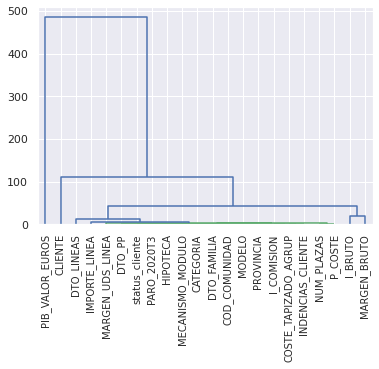

In [ ]:
# 3. Building the Dendrogram	
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
clusters = cluster.hierarchy.linkage(matdist, method = 'single')
# http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
cluster.hierarchy.dendrogram(clusters, color_threshold = 3, labels = names , leaf_rotation=90)
plt.show()

Vamos a obtener la asignación de grupos de cada uno de ellos

In [ ]:
cut = 3 # !!!! ad-hoc
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')

labels #seleccionaríamos sólo una variable de cada clusters. aquí se indica cada variable a qué cluster perenece...coger 1 

array([6, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 3, 5, 1, 1, 1, 1, 7, 1, 1],
      dtype=int32)

Hemos utilizado Single Link con el propósito de aislar rápidamente aquellos elementos que son outliers y que van a ser las características más significativas, en este caso *CLIENTE*, *PIB_VALOR_EUROS*, Luego se distinguen 3 grupos, uno de propósito general,  otro con *I_BRUTO*, *MARGEN_BRUTO* y finalmente *DTO_LINEAs*, *IMPORTE_LINEA*, *status_cliente*   

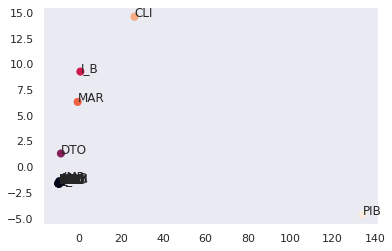

In [ ]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:3]) 

plt.grid()
plt.show()

# DBSCAN
Vamos a identificar elementos outliers mediante la utilización de DBSCAN. El propósito de identificar ouliter es aislar aquellas características que son diferentes a los demás y que nos pueden ayudar a distinguir a los diferentes elementos a los que representan.


Vamos a fijar MinPts = 3 y observar que epsilon podemos establecer


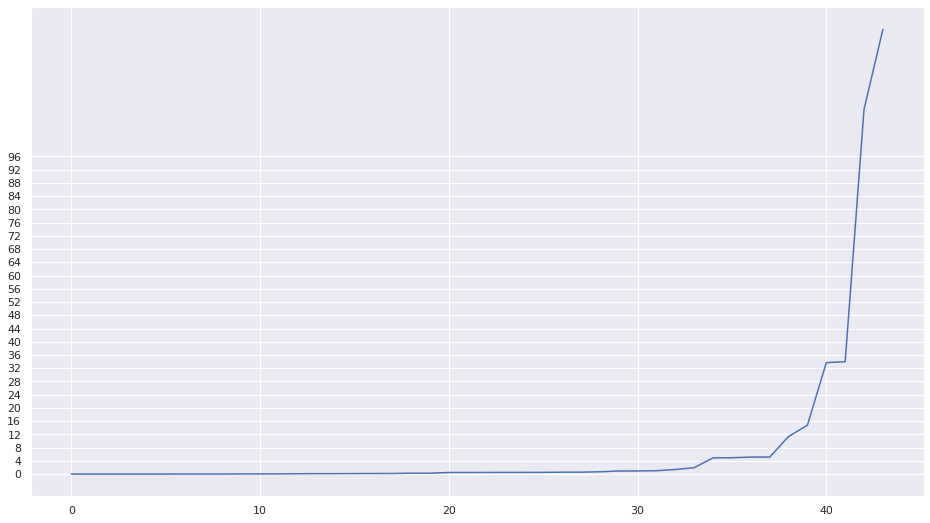

In [ ]:
minPts=2
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(features_norm, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(features_norm):
    for j in range(len(features_norm)):
        if Ar[i][j] != 0:
            seq.append(matdist[i][j])
            
seq.sort()
# establecer intervalo ejes
fig = plt.figure(figsize=(16,9))
ax = fig.gca()
ax.set_xticks(np.arange(0, 120, 10))
ax.set_yticks(np.arange(0, 100, 4))

plt.plot(seq)


plt.show() # vemso el codo para seleccionar la mejor epsilon..en este caso entre 0.5 y 32 e ir probando


Vamos a establecer un rango amplio de pruebas teniendo en cuenta que buscamos aislar elementos diferentes a los demás.

In [ ]:
from sklearn.cluster import DBSCAN

for eps in np.arange(0.5, 32, 0.20): #hacemos un barrido entre los valores vistos anteriormente
  db = DBSCAN(eps, min_samples=minPts).fit(features_norm)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  print ("%6.2f, %d, %d" % (eps, n_clusters_, n_outliers))
  
#labels da para cada epsilon el clster al que pertenece y el nmero de outlairs

  0.50, 2, 10
  0.70, 1, 7
  0.90, 1, 7
  1.10, 1, 6
  1.30, 1, 6
  1.50, 1, 5
  1.70, 1, 5
  1.90, 1, 5
  2.10, 1, 5
  2.30, 1, 5
  2.50, 1, 5
  2.70, 1, 5
  2.90, 1, 5
  3.10, 1, 5
  3.30, 1, 5
  3.50, 1, 5
  3.70, 1, 5
  3.90, 1, 5
  4.10, 1, 5
  4.30, 1, 5
  4.50, 1, 5
  4.70, 1, 5
  4.90, 1, 5
  5.10, 1, 4
  5.30, 2, 2
  5.50, 2, 2
  5.70, 2, 2
  5.90, 2, 2
  6.10, 2, 2
  6.30, 2, 2
  6.50, 2, 2
  6.70, 2, 2
  6.90, 2, 2
  7.10, 2, 2
  7.30, 2, 2
  7.50, 2, 2
  7.70, 2, 2
  7.90, 2, 2
  8.10, 2, 2
  8.30, 2, 2
  8.50, 2, 2
  8.70, 2, 2
  8.90, 2, 2
  9.10, 2, 2
  9.30, 2, 2
  9.50, 2, 2
  9.70, 2, 2
  9.90, 2, 2
 10.10, 2, 2
 10.30, 2, 2
 10.50, 2, 2
 10.70, 2, 2
 10.90, 2, 2
 11.10, 2, 2
 11.30, 2, 2
 11.50, 1, 2
 11.70, 1, 2
 11.90, 1, 2
 12.10, 1, 2
 12.30, 1, 2
 12.50, 1, 2
 12.70, 1, 2
 12.90, 1, 2
 13.10, 1, 2
 13.30, 1, 2
 13.50, 1, 2
 13.70, 1, 2
 13.90, 1, 2
 14.10, 1, 2
 14.30, 1, 2
 14.50, 1, 2
 14.70, 1, 2
 14.90, 1, 2
 15.10, 1, 2
 15.30, 1, 2
 15.50, 1, 2
 15.70, 1, 

Como podemos observar DBSCAN nos agrupa los elementos en un grupo y el resto son outliers. El número de outliers si es significativo tenerlo en cuenta, por lo que nos vamos a quedar con las parametrizaciones que nos ofrecen un mayor número de outliers.

In [ ]:
db = DBSCAN(eps=5.1, min_samples=minPts).fit(features_norm) # podemos hacer con 2.5
labels = db.labels_
labels #hay un único clusters 0 y el -1 indica que son outliers

array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,
        0,  0, -1,  0,  0])

Visualizamos los resultados

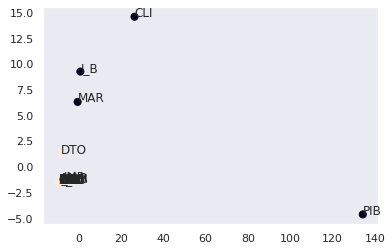

In [ ]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:3]) 
plt.grid()
plt.show() # los negros son outlaier

Y aunque podríamos proceder a su intepretación en este caso lo que vamos a hacer es identificar aquellos elementos que son outliers

In [ ]:
df_feat['dbscan_group'] = labels # nos quedamos con los outliers

df_feat[df_feat['dbscan_group'] == -1] # no está del todo bien , por lo que nos deberíamos quedar con alguna de cada clusters

TIPO_TAPICERIA,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,...,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,P,T,T,T,T,dbscan_group
CLIENTE,386.00,386.00,386.00,4951.00,4951.00,4951.00,6041.00,6041.00,6305.00,6305.00,6464.0,6464.0,6790.00,6790.00,7254.00,8031.0,8031.0,8031.0,8077.00,8077.00,8758.00,47.00,47.00,386.00,386.00,386.00,386.00,386.00,386.00,386.00,386.00,386.00,813.00,813.00,936.00,936.00,936.00,936.00,1114.00,1114.00,...,4775.00,4775.00,4775.00,4775.00,4775.00,6220.00,6289.00,6289.00,6307.0,6307.0,6307.0,6307.0,6307.0,6307.00,6307.00,6307.0,6632.0,7040.00,7040.00,7040.00,7040.00,7761.00,7761.00,8169.00,8169.00,8169.0,8662.0,8662.0,9150.0,9314.00,9314.00,9314.00,9314.00,9499.00,9519.0,9758.00,9758.00,9758.00,9758.00,-1
I_BRUTO,1472.46,1472.46,1472.46,1305.48,1305.48,1305.48,988.08,988.08,1075.02,1075.02,1048.8,1048.8,1437.96,1437.96,495.42,856.0,856.0,856.0,1248.90,1248.90,663.78,1021.20,1021.20,832.14,832.14,1339.30,1339.30,1339.30,1339.30,1297.20,1297.20,1297.20,1091.58,1091.58,1515.24,1515.24,1515.24,1515.24,1173.00,1173.00,...,1338.40,1338.40,1295.00,1295.00,1295.00,730.80,1100.40,1100.40,1995.0,1995.0,1995.0,1995.0,1995.0,817.60,817.60,61.6,763.0,1370.60,1370.60,1370.60,1370.60,1247.40,1247.40,1022.00,1022.00,518.0,938.0,938.0,478.8,908.60,908.60,712.60,875.00,775.60,616.0,2151.27,2151.27,2151.27,2151.27,-1
MARGEN_BRUTO,1354.66,1354.66,1354.66,1074.70,1074.70,1074.70,890.85,890.85,1021.27,1021.27,945.6,945.6,1338.73,1338.73,495.42,834.6,834.6,834.6,1162.71,1162.71,630.59,970.76,970.76,765.57,765.57,1232.16,1232.16,1232.16,1232.16,1193.42,1193.42,1193.42,993.33,993.33,1366.15,1366.15,1366.15,1366.15,1092.08,1092.08,...,1219.81,1219.81,1180.26,1180.26,1180.26,694.26,981.34,981.34,1798.7,1798.7,1798.7,1798.7,1798.7,737.14,737.14,61.6,763.0,1276.03,1276.03,1276.03,1276.03,924.33,924.33,921.44,921.44,518.0,938.0,938.0,478.8,785.49,785.49,616.05,756.44,706.88,573.5,1982.40,1982.40,1982.40,1982.40,-1
PIB_VALOR_EUROS,29885.00,29885.00,29885.00,27134.00,27134.00,27134.00,19077.00,19077.00,20465.00,20465.00,22882.0,22882.0,27994.00,27994.00,20766.00,34041.0,34041.0,34041.0,20766.00,20766.00,25508.00,19066.00,19066.00,29885.00,29885.00,29885.00,29885.00,29885.00,29885.00,29885.00,29885.00,29885.00,26528.00,26528.00,34041.00,34041.00,34041.00,34041.00,30508.00,30508.00,...,32015.00,32015.00,32015.00,32015.00,32015.00,17964.00,20465.00,20465.00,34041.0,34041.0,34041.0,34041.0,34041.0,34041.00,34041.00,34041.0,17231.0,27011.00,27011.00,27011.00,27011.00,20766.00,20766.00,20465.00,20465.00,20465.0,17465.0,17465.0,19888.0,25482.00,25482.00,25482.00,25482.00,36921.00,21981.0,18022.00,18022.00,18022.00,18022.00,-1
